In [1]:
# Libraries for Data Manipulation
import pandas as pd
import numpy as np

import gc

# Libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from scipy.stats import skew
sns.set(style="white", font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0", "figure.facecolor":"#FFFAF0"})
sns.set_context("poster", font_scale=.7)
import matplotlib.ticker as ticker

# Libraries to Handle Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for Statistical Analysis
from scipy import stats
from scipy.stats import chi2, chi2_contingency

# Setting Display Options
pd.set_option("display.max.columns", None)

# Machine Learning Algorithms
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import joblib


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout,LeakyReLU
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.optimizers import SGD
import keras_tuner
import keras


# Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,silhouette_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

In [2]:
testing_set = pd.read_csv('.venv/Data/UNSW_NB15_testing-set.csv')
training_set = pd.read_csv('.venv/Data/UNSW_NB15_training-set.csv')
LIST_EVENTS = pd.read_csv('.venv/Data/UNSW-NB15_LIST_EVENTS.csv')
NB15_1 = pd.read_csv('.venv/Data/UNSW-NB15_1.csv')
NB15_2 = pd.read_csv('.venv/Data/UNSW-NB15_2.csv')
NB15_3 = pd.read_csv('.venv/Data/UNSW-NB15_3.csv')
NB15_4 = pd.read_csv('.venv/Data/UNSW-NB15_4.csv')
NB15_features = pd.read_csv('.venv/Data/NUSW-NB15_features.csv', encoding='cp1252')

testing_set.head()
training_set.head()
LIST_EVENTS.head()
NB15_1.head()
NB15_2.head()
NB15_3.head()
NB15_4.head()

NB15_1.columns = NB15_features['Name']
NB15_2.columns = NB15_features['Name']
NB15_3.columns = NB15_features['Name']
NB15_4.columns = NB15_features['Name']

In [3]:
train_df = pd.concat([NB15_1, NB15_2, NB15_3, NB15_4], ignore_index=True)
# Shuffle the data points in train_df
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
train_df

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986,86,62,252,2,1,-,2.304490e+04,1.205512e+03,6,2,255,255,761934099,3893365633,164,43,0,0,3661.562382,0.000000,1424224369,1424224369,57.071200,0.002000,0.257434,0.182930,0.074504,0,3,NaN,NaN,,10,8,4,5,3,1,7,NaN,0
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540,1644,31,29,4,4,-,3.675341e+04,3.952773e+04,16,18,255,255,734569334,2907227880,96,91,0,0,1385.623880,35.106383,1424252728,1424252728,20.925067,18.459766,0.000596,0.000494,0.000102,0,0,NaN,NaN,,14,6,8,12,5,1,6,NaN,0
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536,304,31,29,0,0,-,1.067800e+04,6.056179e+03,4,4,0,0,0,0,134,76,0,0,116.927883,123.543578,1421934312,1421934313,82.683000,87.363000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,9,16,7,6,1,1,3,NaN,0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114,0,254,0,0,0,dns,5.066666e+07,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424252582,1424252582,0.009000,0.000000,0.000000,0.000000,0.000000,0,2,NaN,NaN,,33,33,17,17,17,17,33,Generic,1
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146,178,31,29,0,0,dns,5.412419e+05,6.598702e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424243836,1424243836,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,2,2,5,4,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540038,59.166.0.8,34415,149.171.126.0,5190,tcp,FIN,0.008119,1920,4312,31,29,6,6,-,1.806134e+06,4.072423e+06,22,24,255,255,2097393639,4247267529,87,180,0,0,24.265009,21.052982,1421931570,1421931570,0.369952,0.328696,0.000680,0.000548,0.000132,0,0,0.0,0.0,0,3,10,4,1,1,1,1,NaN,0
2540039,59.166.0.8,56352,149.171.126.2,53,udp,CON,0.001047,130,162,31,29,0,0,dns,4.966571e+05,6.189111e+05,2,2,0,0,0,0,65,81,0,0,0.000000,0.000000,1424238783,1424238783,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,1,1,2,6,1,1,1,NaN,0
2540040,59.166.0.9,25527,149.171.126.4,6881,tcp,FIN,0.013106,1540,1644,31,29,4,4,-,8.814284e+05,9.479628e+05,16,18,255,255,1097293365,3252878568,96,91,0,0,59.343892,1.359939,1424257156,1424257156,0.852800,0.744353,0.000564,0.000449,0.000115,0,0,NaN,NaN,,12,11,8,9,6,1,6,NaN,0
2540041,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000003,114,0,254,0,0,0,dns,1.520000e+08,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424253397,1424253397,0.003000,0.000000,0.000000,0.000000,0.000000,0,2,NaN,NaN,,37,37,26,26,26,13,37,Generic,1


In [4]:
print("dataset shape: ",train_df.shape)
print("Duplicates in train_df: ",train_df.duplicated().sum())
train_df = train_df.drop_duplicates()

missing_data = train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(train_df))*100,2)
missing_data

# NaN values implies that no attack are there for that particular row data, Replace NaN values in the 'attack_cat' column with 'not attacked'
train_df['attack_cat'].fillna('normal',inplace = True)
train_df['attack_cat'] = train_df['attack_cat'].apply(lambda x: x.strip().lower())

# missing values imply that there were no flows with HTTP methods in certain instances so we will replace the NAN with 0
train_df['ct_flw_http_mthd'].fillna(0, inplace=True)

# is_ftp_login is of type binary that mean it takes 1(user has loged in) or 0 (or not) so the best approch is to replace nan with 0
train_df['is_ftp_login'].fillna(0, inplace=True)

cols = train_df.columns

dataset shape:  (2540043, 49)
Duplicates in train_df:  480626


In [5]:
for column in cols:
    print('Unique values of ',column , 'with dtype',train_df[column].dtype, 'have total values',train_df[column].nunique(),'->',  train_df[column].unique())
    print('-'*100)

train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].astype('str')
train_df['ct_ftp_cmd'].dtype
train_df['ct_ftp_cmd'].unique()
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].replace(' ', '0')
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].astype('int')

def convert_to_binary(df, column):
    df[column] = (df[column] > 0).astype(int)
    return df

column = 'is_ftp_login'
convert_to_binary(train_df, column)

#Converting in string first to ensure consistency
train_df['sport'] = train_df['sport'].astype('str')

# Handling non-integer values or NaNs
train_df['sport'] = pd.to_numeric(train_df['sport'], errors='coerce').fillna(0).astype(int)

#Converting in string first to ensure consistency
train_df['dsport'] = train_df['dsport'].astype('str')

# Handling non-integer values or NaNs
train_df['dsport'] = pd.to_numeric(train_df['dsport'], errors='coerce').fillna(0).astype(int)

numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(len(numerical_columns))

Unique values of  srcip with dtype object have total values 43 -> ['175.45.176.3' '59.166.0.8' '59.166.0.0' '175.45.176.1' '59.166.0.5'
 '59.166.0.7' '175.45.176.0' '149.171.126.14' '59.166.0.1' '59.166.0.9'
 '149.171.126.15' '149.171.126.18' '59.166.0.4' '59.166.0.2' '59.166.0.3'
 '59.166.0.6' '175.45.176.2' '149.171.126.10' '10.40.182.1'
 '149.171.126.12' '10.40.170.2' '10.40.85.30' '149.171.126.2'
 '10.40.182.3' '10.40.85.1' '10.40.182.6' '10.40.85.10' '149.171.126.7'
 '149.171.126.6' '149.171.126.0' '149.171.126.8' '149.171.126.13'
 '149.171.126.5' '192.168.241.243' '149.171.126.4' '149.171.126.9'
 '149.171.126.1' '149.171.126.3' '149.171.126.11' '149.171.126.19'
 '149.171.126.17' '149.171.126.16' '127.0.0.1']
----------------------------------------------------------------------------------------------------
Unique values of  sport with dtype object have total values 100343 -> [57672 38052 42911 ... '17953' '20349' '53235']
---------------------------------------------------------

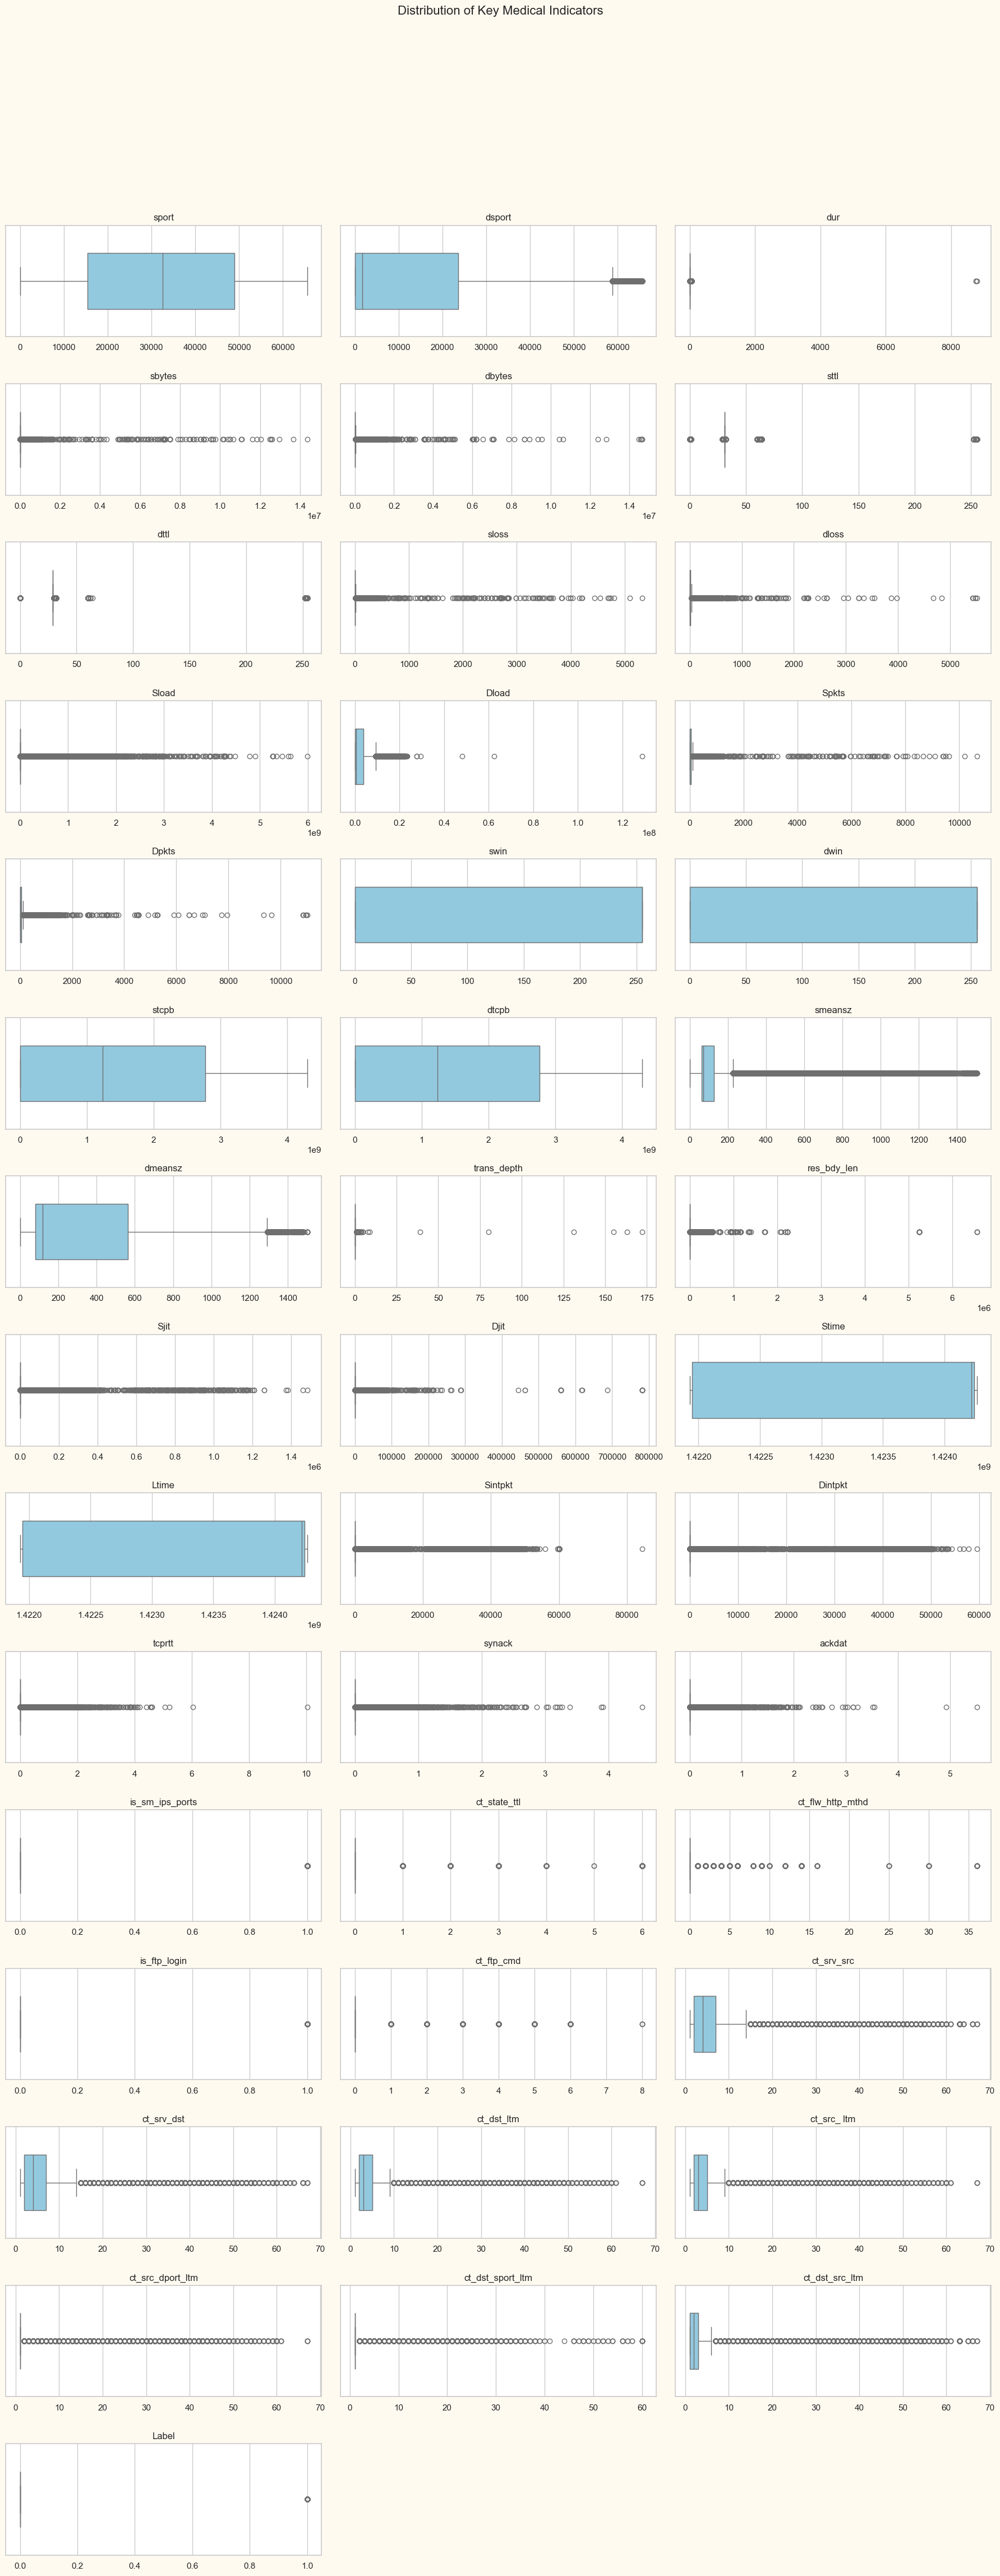

In [6]:
import math

# Number of numerical columns
num_columns = len(numerical_columns)

# Calculate the number of rows and columns needed for the subplots
num_cols = 3  # Fixed number of columns
num_rows = math.ceil(num_columns / num_cols)  # Calculate rows needed

plt.figure(figsize=(18, num_rows * 3))

sns.set_palette("husl")
sns.set(style="whitegrid")

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=train_df[col], color='skyblue', width=0.5)
    plt.title(col)
    plt.xlabel("")

plt.suptitle("Distribution of Key Medical Indicators", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [7]:
# Extract numerical columns
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Columns to exclude
exclude_columns = ['sport', 'swim', 'dwim', 'stcpb', 'dtcpb', 'Stime', 'Ltime']
# Filter out the columns to exclude
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

for col in numerical_columns:
    median_value = train_df[col].median()
    lower_bound = train_df[col].quantile(0.25) - 1.5 * (train_df[col].quantile(0.75) - train_df[col].quantile(0.25))
    upper_bound = train_df[col].quantile(0.75) + 1.5 * (train_df[col].quantile(0.75) - train_df[col].quantile(0.25))
    train_df[col] = train_df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

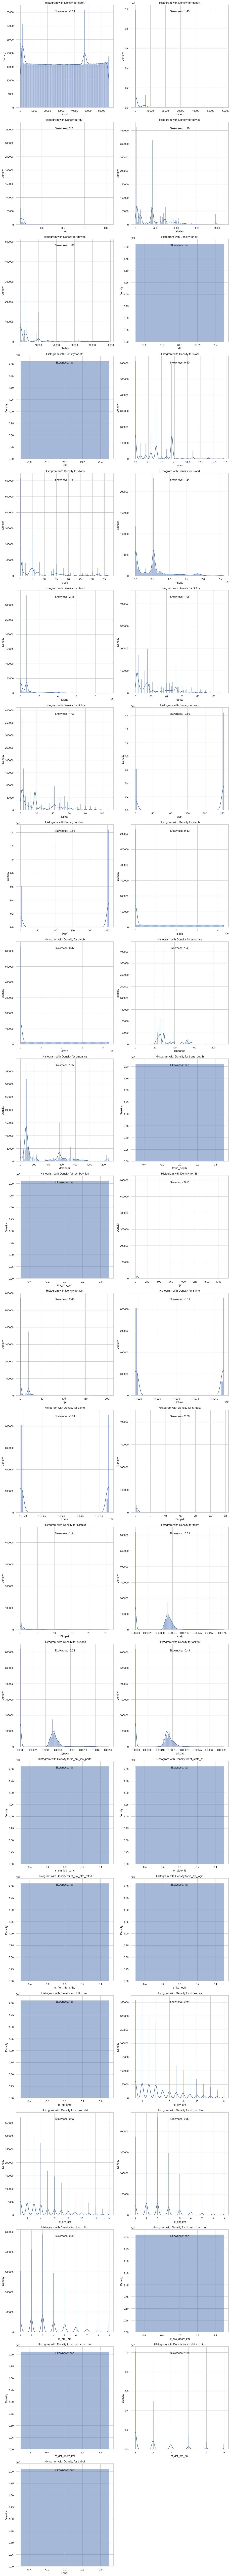

In [8]:
# Set the figure size and arrange plots horizontally in pairs
numerical_features = train_df.select_dtypes(include=['number']).columns
num_plots = len(numerical_features)
num_rows = (num_plots + 1) // 2  # Ensure enough rows to accommodate all features
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 7 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the selected columns and create histograms with density
for i, col in enumerate(numerical_features):
    sns.histplot(data=train_df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with Density for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

    # Calculate skewness
    skewness = skew(train_df[col].dropna())
    axes[i].text(0.5, 0.95, f'Skewness: {skewness:.2f}', horizontalalignment='center', verticalalignment='top',
                 transform=axes[i].transAxes)

# Remove any empty subplots if the number of features is odd
if num_plots % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [9]:
def transform(X):
    eps = 1e-5
    numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

    for col in numerical_columns:
        skewness = skew(X[col])
        if skewness > 0:  # Positive skew
            X[col] = np.log(X[col] + eps)
        elif skewness < 0:  # Negative skew
            X[col] = np.log(np.max(X[col] + eps) - X[col] + eps)
        else:  # Symmetric or zero skew
            X[col] = X[col]  # No transformation needed

    return X

transform(train_df)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,8.969923,149.171.126.15,8.089482,tcp,CON,-1.253983,6.893656,4.454347,31.0,29.0,0.693152,0.000010,-,10.045200,7.094659,1.791761,0.693152,-10.819778,-10.819778,20.451371,22.082540,5.099866,3.761200,0.0,0.0,3.447042,-11.512925,10.537389,10.537415,-0.281908,-6.209621,-6.754176,-6.985717,-8.286081,0.0,0.0,0.0,0.0,0.0,2.302586,2.079443,1.386297,1.609440,1.0,1.0,0.693152,normal,0.0
1,59.166.0.8,10.221323,149.171.126.9,8.836519,tcp,FIN,-1.157341,7.339538,7.404888,31.0,29.0,1.386297,1.386297,-,10.511986,10.584758,2.772589,2.890372,-10.819778,-10.819778,20.414795,21.790466,4.564348,4.510860,0.0,0.0,7.233906,3.558383,9.142062,9.142169,3.040948,2.915594,-6.712188,-6.966444,-8.191493,0.0,0.0,0.0,0.0,0.0,2.639058,1.791761,2.079443,1.098616,1.0,1.0,1.791761,normal,0.0
2,59.166.0.0,10.026767,149.171.126.2,10.559919,udp,CON,-1.200014,6.284134,5.717028,31.0,29.0,-11.512925,-11.512925,-,9.275941,8.708834,1.386297,1.386297,5.541264,5.541264,-11.512925,-11.512925,4.897840,4.330733,0.0,0.0,4.761557,4.816594,14.660415,14.660415,-0.281908,-0.353632,-6.313324,-6.545198,-7.877974,0.0,0.0,0.0,0.0,0.0,2.197226,1.386297,1.945912,1.791761,1.0,1.0,1.098616,normal,0.0
3,175.45.176.1,9.803446,149.171.126.14,3.970292,udp,INT,-10.871072,4.736199,-11.512925,31.0,29.0,-11.512925,-11.512925,dns,13.200695,-11.512925,0.693152,-11.512925,5.541264,5.541264,-11.512925,-11.512925,4.043051,-11.512925,0.0,0.0,-11.512925,-11.512925,9.157572,9.157678,-4.709420,-11.512925,-6.313324,-6.545198,-7.877974,0.0,0.0,0.0,0.0,0.0,1.386297,1.386297,1.098616,1.098616,1.0,1.0,0.693152,generic,0.0
4,59.166.0.5,8.291797,149.171.126.6,3.970292,udp,CON,-6.822495,4.983607,5.181784,31.0,29.0,-11.512925,-11.512925,dns,13.201622,13.399799,0.693152,0.693152,5.541264,5.541264,-11.512925,-11.512925,4.290460,4.488636,0.0,0.0,-11.512925,-11.512925,9.810934,9.810988,-4.709420,-4.960418,-6.313324,-6.545198,-7.877974,0.0,0.0,0.0,0.0,0.0,0.693152,0.693152,1.609440,1.386297,1.0,1.0,0.000010,normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540035,59.166.0.2,10.498057,149.171.126.9,4.962845,tcp,FIN,-3.445776,8.964440,9.619798,31.0,29.0,1.386297,3.465736,-,14.481754,15.137396,2.772589,2.890372,-10.819778,-10.819778,21.073782,21.994746,4.158883,4.787492,0.0,0.0,2.836722,2.681382,10.196120,10.196157,-1.249347,-1.383187,-6.767993,-6.995494,-8.343240,0.0,0.0,0.0,0.0,0.0,1.609440,1.791761,0.000010,1.386297,1.0,1.0,0.000010,normal,0.0
2540037,59.166.0.0,10.761238,149.171.126.0,9.764570,udp,CON,-3.347932,6.269096,5.717028,31.0,29.0,-11.512925,-11.512925,-,11.409072,10.857003,1.386297,1.386297,5.541264,5.541264,-11.512925,-11.512925,4.882802,4.330733,0.0,0.0,2.241743,2.386864,14.650474,14.650475,1.896521,2.041135,-6.313324,-6.545198,-7.877974,0.0,0.0,0.0,0.0,0.0,2.397896,1.386297,1.098616,1.945912,1.0,1.0,0.000010,normal,0.0
2540038,59.166.0.8,10.345606,149.171.126.0,8.554489,tcp,FIN,-4.812317,7.560080,8.369157,31.0,29.0,1.791761,1.791761,-,14.406699,15.219749,3.091043,3.178054,-10.819778,-10.819778,21.463961,22.169542,4.465908,5.192957,0.0,0.0,3.189036,3.047043,14.661593,14.661593,-0.994355,-1.112592,-6.783769,-7.025413,-8.306122,0.0,0.0,0.0,0.0,0.0,1.098616,2.302586,1.386297,0.000010,1.0,1.0,0.000010,normal,0.0
2540039,59.166.0.8,9.125109,149.171.126.2,3.970292,udp,CON,-6.852321,4.867535,5.087596,31.0,29.0,-11.512925,-11.512925,dns,13.115655,13.335717,0.693152,0.693152,5.541264,5.541264,-11.512925,-11.512925,4.174387,4.394449,0.0,

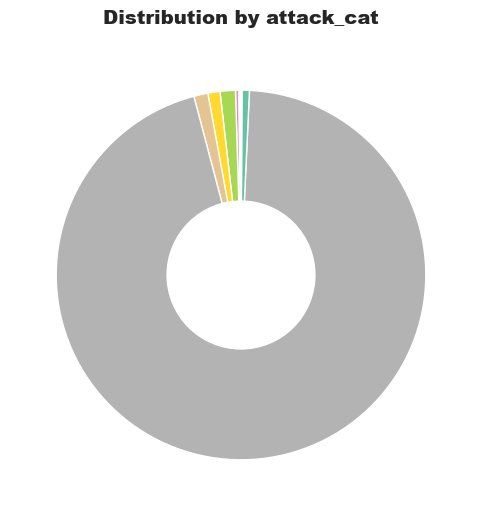

Before resampling: attack_cat
normal            1959771
exploits            27600
generic             25378
fuzzers             21795
reconnaissance      13357
dos                  5665
analysis             2185
backdoor             1684
shellcode            1511
backdoors             300
worms                 171
Name: count, dtype: int64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


def pie_bar_plot(df, col):
    plt.figure(figsize=(10, 6))

    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()

    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=None, autopct="", startangle=90, colors=colors)
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    plt.show()

pie_bar_plot(train_df, 'attack_cat')

# Print class distribution before resampling
print("Before resampling:", train_df['attack_cat'].value_counts())

In [11]:
def generate_features(df):
    # Duration
    df['duration'] = df['Ltime'] - df['Stime']

    # Ratios
    df['byte_ratio'] = df['sbytes'] / (df['dbytes'] + 1)
    df['pkt_ratio'] = df['Spkts'] / (df['Dpkts'] + 1)
    df['load_ratio'] = df['Sload'] / (df['Dload'] + 1)
    df['jit_ratio'] = df['Sjit'] / (df['Djit'] + 1)
    df['inter_pkt_ratio'] = df['Sintpkt'] / (df['Dintpkt'] + 1)
    df['tcp_setup_ratio'] = df['tcprtt'] / (df['synack'] + df['ackdat'] + 1)

    # Aggregate Features
    df['total_bytes'] = df['sbytes'] + df['dbytes']
    df['total_pkts'] = df['Spkts'] + df['Dpkts']
    df['total_load'] = df['Sload'] + df['Dload']
    df['total_jitter'] = df['Sjit'] + df['Djit']
    df['total_inter_pkt'] = df['Sintpkt'] + df['Dintpkt']
    df['total_tcp_setup'] = df['tcprtt'] + df['synack'] + df['ackdat']

    # Interaction Features
    df['byte_pkt_interaction_src'] = df['sbytes'] * df['Spkts']
    df['byte_pkt_interaction_dst'] = df['dbytes'] * df['Dpkts']
    df['load_jit_interaction_src'] = df['Sload'] * df['Sjit']
    df['load_jit_interaction_dst'] = df['Dload'] * df['Djit']
    df['pkt_jit_interaction_src'] = df['Spkts'] * df['Sjit']
    df['pkt_jit_interaction_dst'] = df['Dpkts'] * df['Djit']

    # Statistical Features
    df['mean_pkt_size'] = df['smeansz'] + df['dmeansz']
    df['tcp_seq_diff'] = df['stcpb'] - df['dtcpb']

    return df

generate_features(train_df)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label,duration,byte_ratio,pkt_ratio,load_ratio,jit_ratio,inter_pkt_ratio,tcp_setup_ratio,total_bytes,total_pkts,total_load,total_jitter,total_inter_pkt,total_tcp_setup,byte_pkt_interaction_src,byte_pkt_interaction_dst,load_jit_interaction_src,load_jit_interaction_dst,pkt_jit_interaction_src,pkt_jit_interaction_dst,mean_pkt_size,tcp_seq_diff
0,175.45.176.3,8.969923,149.171.126.15,8.089482,tcp,CON,-1.253983,6.893656,4.454347,31.0,29.0,0.693152,0.000010,-,10.045200,7.094659,1.791761,0.693152,-10.819778,-10.819778,20.451371,22.082540,5.099866,3.761200,0.0,0.0,3.447042,-11.512925,10.537389,10.537415,-0.281908,-6.209621,-6.754176,-6.985717,-8.286081,0.0,0.0,0.0,0.0,0.0,2.302586,2.079443,1.386297,1.609440,1.0,1.0,0.693152,normal,0.0,2.652555e-05,1.263883,1.058240,1.240966,-0.327886,0.054113,0.473253,11.348004,2.484913,17.139859,-8.065883,-6.491529,-22.025974,12.351786,3.087541,34.626227,-81.680285,6.176276,-7.980209,8.861067,-1.631169
1,59.166.0.8,10.221323,149.171.126.9,8.836519,tcp,FIN,-1.157341,7.339538,7.404888,31.0,29.0,1.386297,1.386297,-,10.511986,10.584758,2.772589,2.890372,-10.819778,-10.819778,20.414795,21.790466,4.564348,4.510860,0.0,0.0,7.233906,3.558383,9.142062,9.142169,3.040948,2.915594,-6.712188,-6.966444,-8.191493,0.0,0.0,0.0,0.0,0.0,2.639058,1.791761,2.079443,1.098616,1.0,1.0,1.791761,normal,0.0,1.070606e-04,0.873246,0.712680,0.907398,1.586945,0.776625,0.474094,14.744425,5.662962,21.096744,10.792289,5.956542,-21.870126,20.349524,21.402882,76.042718,37.664625,20.056650,10.285052,9.075208,-1.375671
2,59.166.0.0,10.026767,149.171.126.2,10.559919,udp,CON,-1.200014,6.284134,5.717028,31.0,29.0,-11.512925,-11.512925,-,9.275941,8.708834,1.386297,1.386297,5.541264,5.541264,-11.512925,-11.512925,4.897840,4.330733,0.0,0.0,4.761557,4.816594,14.660415,14.660415,-0.281908,-0.353632,-6.313324,-6.545198,-7.877974,0.0,0.0,0.0,0.0,0.0,2.197226,1.386297,1.945912,1.791761,1.0,1.0,1.098616,normal,0.0,0.000000e+00,0.935553,0.580941,0.955412,0.818616,-0.436142,0.470330,12.001162,2.772594,17.984775,9.578151,-0.635541,-20.736496,8.711675,7.925498,44.167925,41.946919,6.600932,6.677229,9.228573,0.000000
3,175.45.176.1,9.803446,149.171.126.14,3.970292,udp,INT,-10.871072,4.736199,-11.512925,31.0,29.0,-11.512925,-11.512925,dns,13.200695,-11.512925,0.693152,-11.512925,5.541264,5.541264,-11.512925,-11.512925,4.043051,-11.512925,0.0,0.0,-11.512925,-11.512925,9.157572,9.157678,-4.709420,-11.512925,-6.313324,-6.545198,-7.877974,0.0,0.0,0.0,0.0,0.0,1.386297,1.386297,1.098616,1.098616,1.0,1.0,0.693152,generic,0.0,1.054130e-04,-0.450512,-0.065933,-1.255663,1.095121,0.447965,0.470330,-6.776727,-10.819773,1.687770,-23.025851,-16.222346,-20.736496,3.282906,132.547453,-151.978620,132.547453,-7.980209,132.547453,-7.469874,0.000000
4,59.166.0.5,8.291797,149.171.126.6,3.970292,udp,CON,-6.822495,4.983607,5.181784,31.0,29.0,-11.512925,-11.512925,dns,13.201622,13.399799,0.693152,0.693152,5.541264,5.541264,-11.512925,-11.512925,4.290460,4.488636,0.0,0.0,-11.512925,-11.512925,9.810934,9.810988,-4.709420,-4.960418,-6.313324,-6.545198,-7.877974,0.0,0.0,0.0,0.0,0.0,0.693152,0.693152,1.609440,1.386297,1.0,1.0,0.000010,normal,0.0,5.484711e-05,0.806176,0.409386,0.916792,1.095121,1.189122,0.470330,10.165390,1.386304,26.601420,-23.025851,-9.669838,-20.736496,3.454398,3.591765,-151.989286,-154.270881,-7.980209,-7.980209,8.779096,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [12]:
# Drop the specified columns from both train_df and test_df
columns_to_drop = ['sport', 'dsport', 'proto','srcip', 'dstip','state', 'service']
train_df.drop(columns=columns_to_drop, inplace=True)

#Checking the categorical columns
cat_columns = train_df.select_dtypes(include=['O']).columns.tolist()

In [13]:
label_encoder = LabelEncoder()
ohe = OneHotEncoder()

train_df['attack_cat'] = label_encoder.fit_transform(train_df['attack_cat'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{'analysis': np.int64(0), 'backdoor': np.int64(1), 'backdoors': np.int64(2), 'dos': np.int64(3), 'exploits': np.int64(4), 'fuzzers': np.int64(5), 'generic': np.int64(6), 'normal': np.int64(7), 'reconnaissance': np.int64(8), 'shellcode': np.int64(9), 'worms': np.int64(10)}


<Axes: title={'center': 'Correlation Plot'}, xlabel='Name', ylabel='Name'>

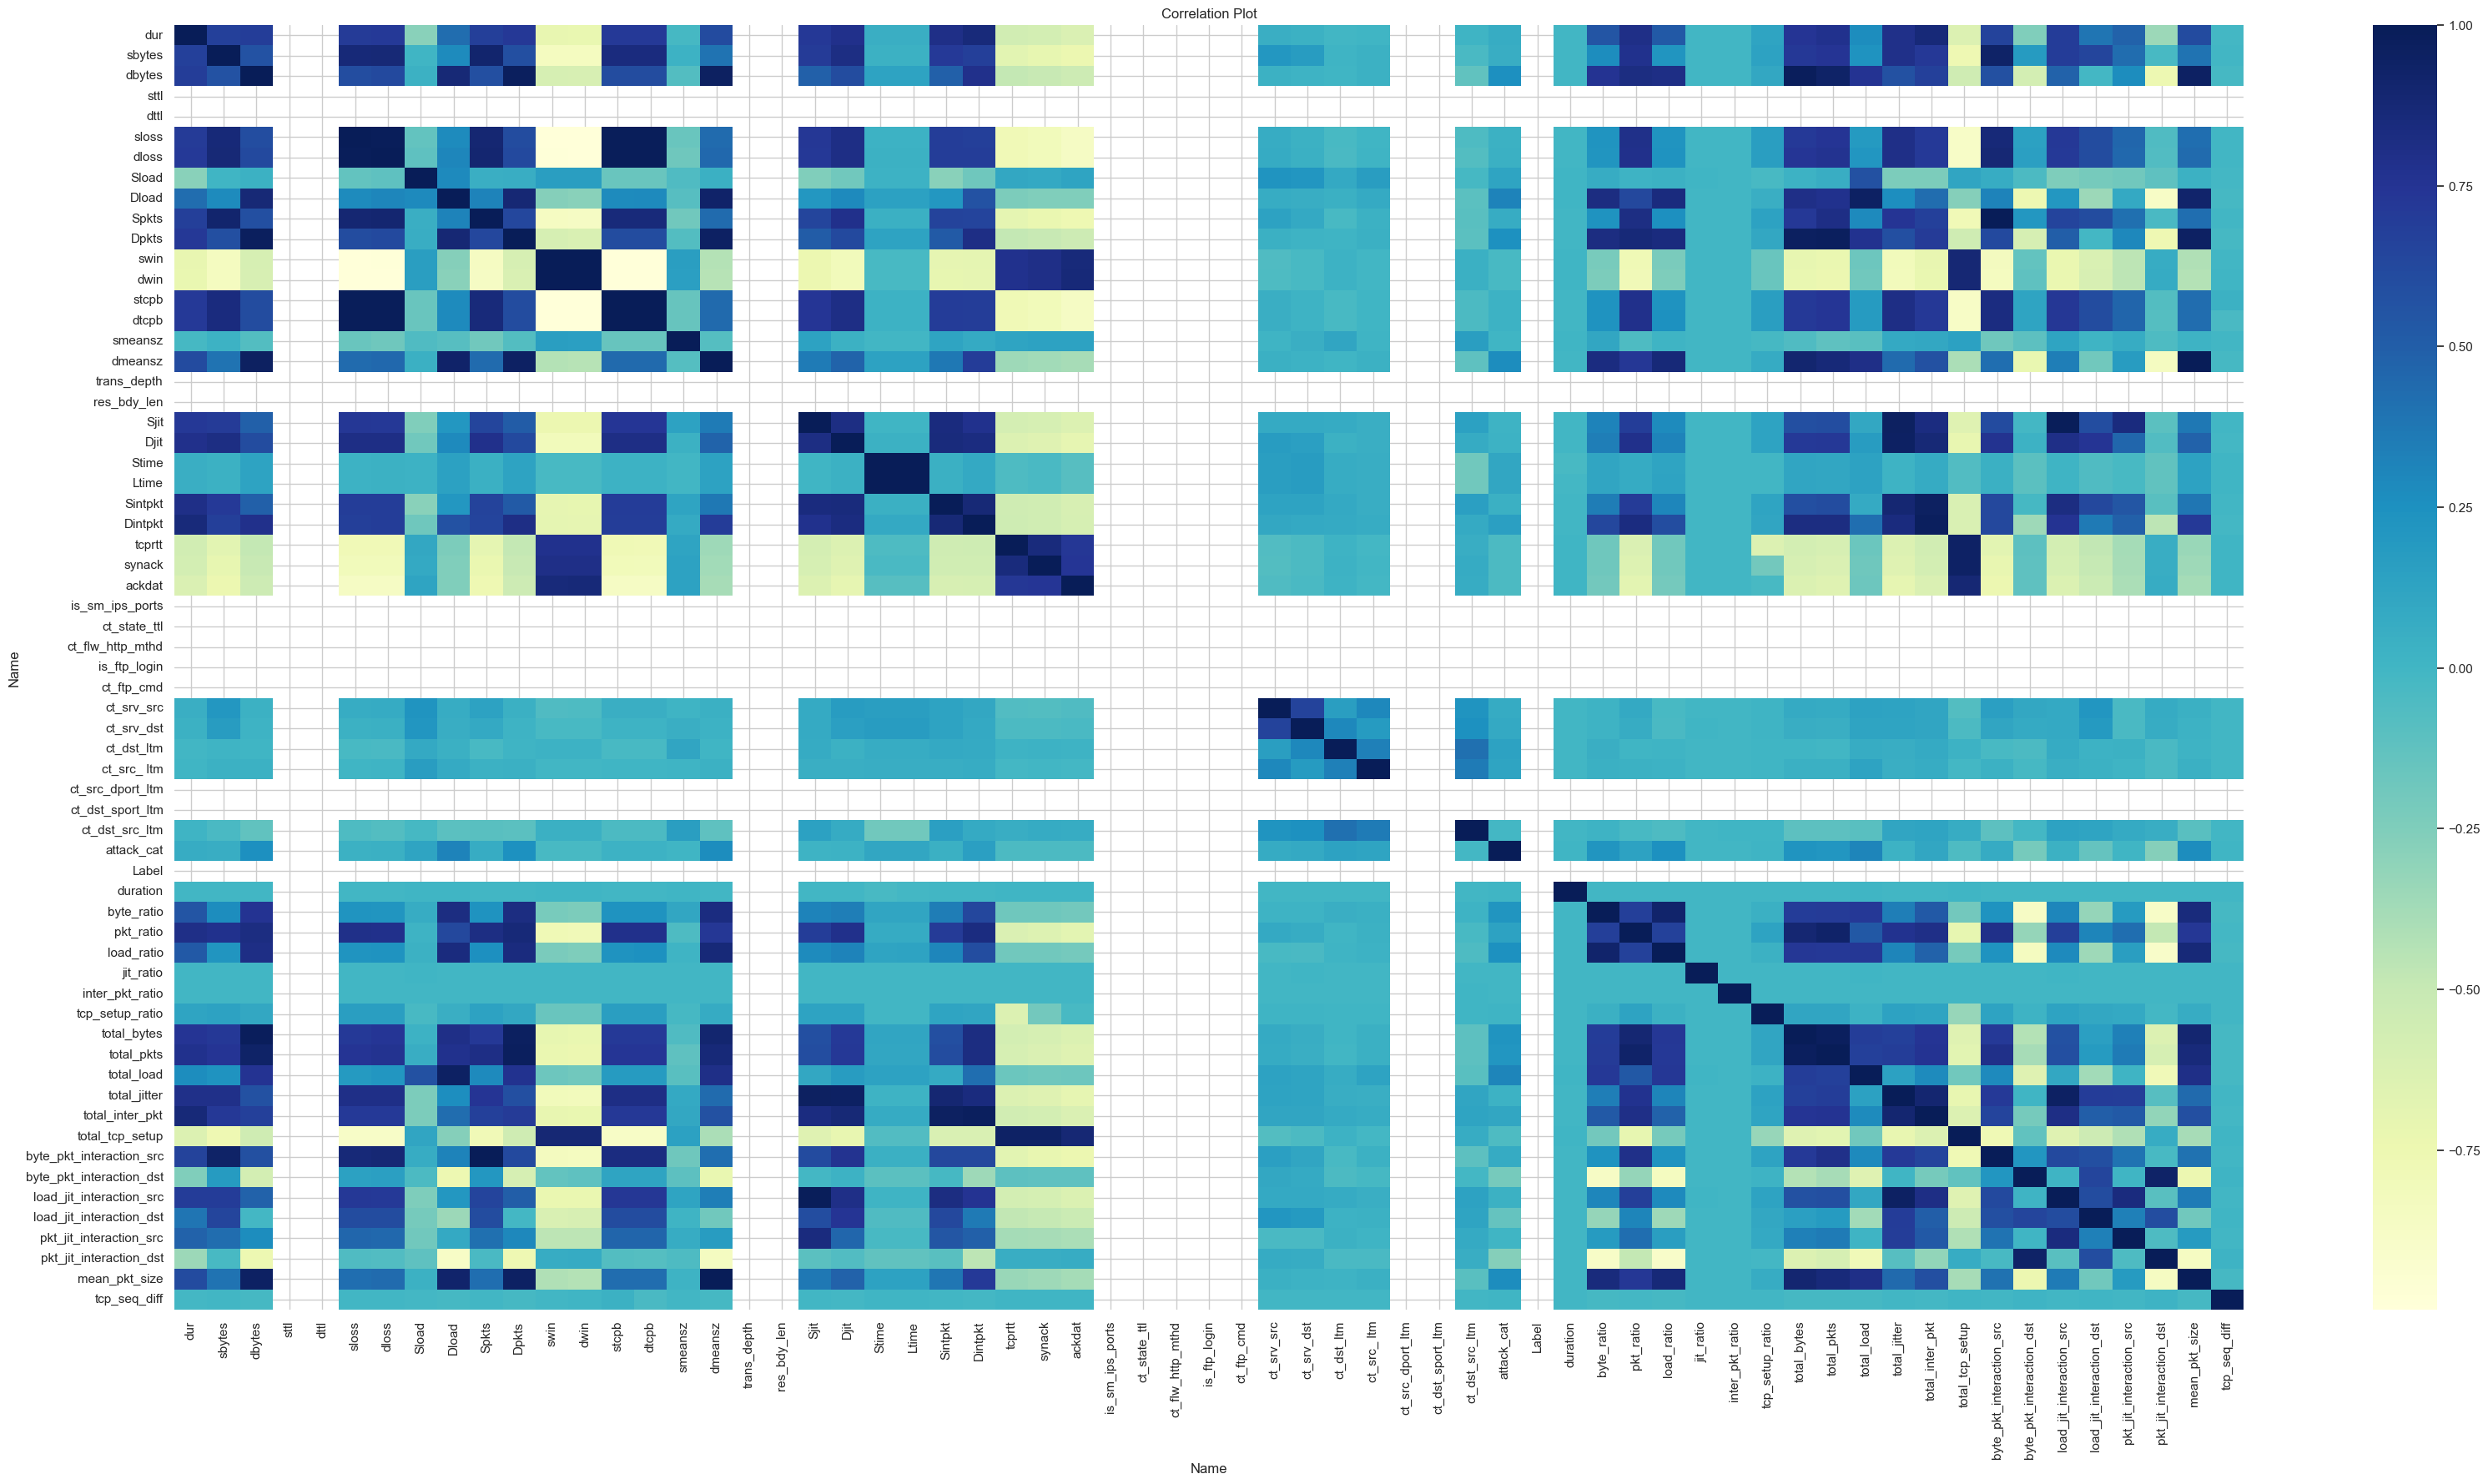

In [14]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(train_df.corr(),cmap='YlGnBu')

In [15]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:
dur and Djit
dur and Sintpkt
dur and Dintpkt
dur and pkt_ratio
dur and total_pkts
dur and total_jitter
dur and total_inter_pkt
sbytes and sloss
sbytes and dloss
sbytes and Spkts
sbytes and stcpb
sbytes and dtcpb
sbytes and Djit
sbytes and pkt_ratio
sbytes and total_jitter
sbytes and byte_pkt_interaction_src
dbytes and Dload
dbytes and Dpkts
dbytes and dmeansz
dbytes and Dintpkt
dbytes and byte_ratio
dbytes and pkt_ratio
dbytes and load_ratio
dbytes and total_bytes
dbytes and total_pkts
dbytes and total_load
dbytes and mean_pkt_size
sloss and dloss
sloss and Spkts
sloss and stcpb
sloss and dtcpb
sloss and Djit
sloss and pkt_ratio
sloss and total_jitter
sloss and byte_pkt_interaction_src
dloss and Spkts
dloss and stcpb
dloss and dtcpb
dloss and Djit
dloss and pkt_ratio
dloss and total_pkts
dloss and total_jitter
dloss and byte_pkt_interaction_src
Dload and Dpkts
Dload and dmeansz
Dload and byte_ratio
Dload and load_ratio
Dload and total_bytes
Dload and total_p

In [16]:
# Create a set of features to drop
features_to_drop = set()

# Iterate over the highly correlated features and add one of each pair to the drop list
for feature1, feature2 in highly_correlated_features:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # You can choose feature1 or feature2 to drop

# Drop the features from the DataFrame
train_df = train_df.drop(columns=features_to_drop)

# Print the remaining features
print("Remaining features after dropping highly correlated ones:")
print(train_df.columns)

Remaining features after dropping highly correlated ones:
Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'Sload', 'swin', 'smeansz',
       'trans_depth', 'res_bdy_len', 'Sjit', 'Stime', 'is_sm_ips_ports',
       'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label', 'duration', 'jit_ratio', 'inter_pkt_ratio', 'tcp_setup_ratio',
       'byte_pkt_interaction_dst', 'load_jit_interaction_dst', 'tcp_seq_diff'],
      dtype='object', name='Name')


In [17]:
x = train_df.drop(['attack_cat'], axis=1)
y = train_df[['attack_cat']]

In [18]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pandas as pd

# Define the desired number of samples for each class
desired_count = 15000

# Define the oversampling strategy for SMOTE
oversample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] < desired_count}

# Define the undersampling strategy for RandomUnderSampler
undersample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] > desired_count}

# Create the SMOTE and RandomUnderSampler objects
smote = SMOTE(sampling_strategy=oversample_strategy)
undersample = RandomUnderSampler(sampling_strategy=undersample_strategy)

# Combine SMOTE and RandomUnderSampler in a pipeline
pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

# Print class distribution before resampling
print("Before resampling:", y.value_counts())
print()

# Apply the pipeline to resample the dataset
x_resampled, y_resampled = pipeline.fit_resample(x, y)

# Print class distribution after resampling
print("After resampling:", y_resampled.value_counts())

x = x_resampled
y = y_resampled

Before resampling: attack_cat
7             1959771
4               27600
6               25378
5               21795
8               13357
3                5665
0                2185
1                1684
9                1511
2                 300
10                171
Name: count, dtype: int64

After resampling: attack_cat
0             15000
1             15000
2             15000
3             15000
4             15000
5             15000
6             15000
7             15000
8             15000
9             15000
10            15000
Name: count, dtype: int64


In [19]:
discrete_features = x.dtypes == int

def mi_score_maker(x,y,discrete_features):
    scores = mutual_info_regression(x,y,discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features':x.columns,
        'Scores':scores
    })
    df = df.sort_values(['Scores'],ascending=False).reset_index(drop=True)
    return df

mi_scores = mi_score_maker(x,y.astype('float64'),discrete_features)
print(mi_scores)

                    Features    Scores
0                     sbytes  1.309311
1                    smeansz  1.060132
2   byte_pkt_interaction_dst  0.754577
3                     dbytes  0.734836
4                   duration  0.675487
5                      Stime  0.599357
6            inter_pkt_ratio  0.557678
7                        dur  0.514601
8   load_jit_interaction_dst  0.477729
9                 ct_srv_dst  0.473541
10                ct_srv_src  0.445217
11                 jit_ratio  0.394940
12                     Sload  0.394431
13           tcp_setup_ratio  0.350301
14                ct_dst_ltm  0.326098
15            ct_dst_src_ltm  0.325625
16               ct_src_ ltm  0.323041
17                      Sjit  0.290688
18              tcp_seq_diff  0.252077
19                      swin  0.175068
20                ct_ftp_cmd  0.003189
21              is_ftp_login  0.002997
22                      sttl  0.001452
23                     Label  0.000727
24           is_sm_ips_po

In [20]:
# Filter features with scores less than 0.001285
low_score_features = mi_scores[mi_scores['Scores'] < 0.01]
# Extract the feature names
low_score_feature_names = low_score_features['Features'].tolist()
# Print the list of low score feature names
low_score_feature_names

['ct_ftp_cmd',
 'is_ftp_login',
 'sttl',
 'Label',
 'is_sm_ips_ports',
 'ct_flw_http_mthd',
 'res_bdy_len',
 'trans_depth',
 'dttl',
 'ct_state_ttl',
 'ct_dst_sport_ltm',
 'ct_src_dport_ltm']

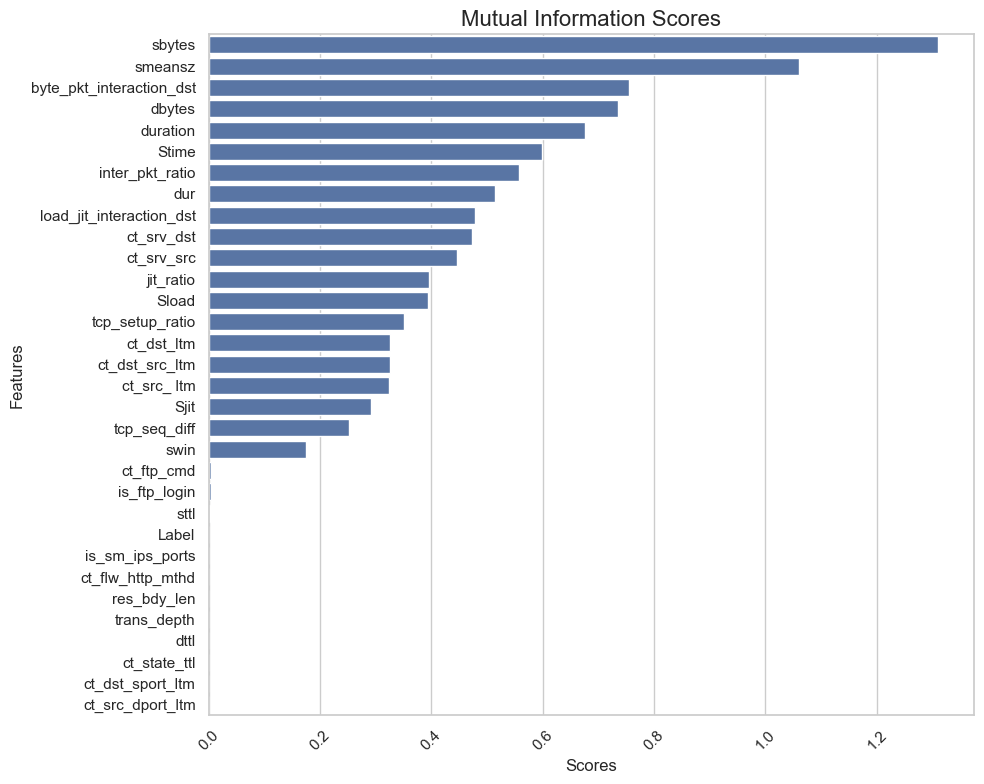

In [21]:
plt.figure(figsize=(10, 8))
# Create the barplot
sns.barplot(x='Scores', y='Features', data=mi_scores)
# Add a title
plt.title("Mutual Information Scores", fontsize=16)
# Rotate the y-axis labels (if needed)
plt.yticks(rotation=0)
# Rotate the x-axis labels (if needed)
plt.xticks(rotation=45)
# Display the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

In [22]:
x.drop(low_score_feature_names,axis=1, inplace = True)

In [23]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

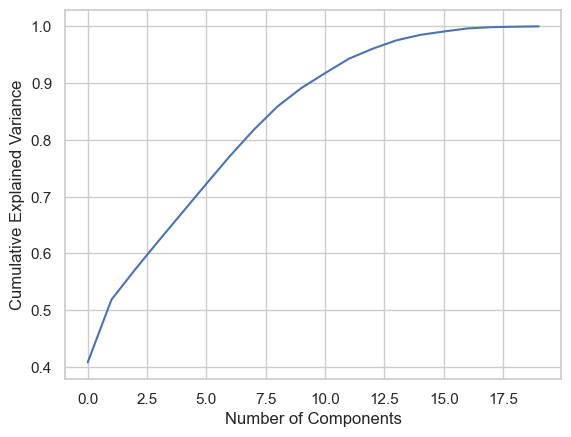

In [24]:
pca = PCA()
pca.fit(x_scaled)  # X_train is your training data
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [25]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

from tensorflow.keras.utils import to_categorical
# Convert label-encoded target variable to one-hot encoding
y_train_one_hot = to_categorical(y_train['attack_cat'], num_classes=11)
y_test_one_hot = to_categorical(y_test['attack_cat'], num_classes=11)

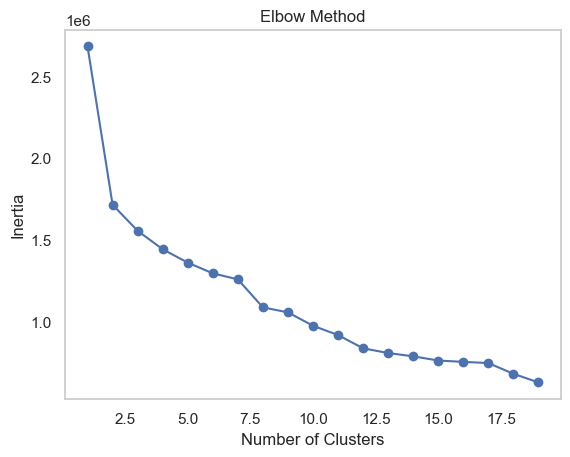

Adjusted Rand Index: 0.2180477616890737
Normalized Mutual Information: 0.3316062918670787
Adjusted Rand Index: 0.13949327284235663
Normalized Mutual Information: 0.25680464615038157


In [26]:
import matplotlib.pyplot as plt
y_train_one_hot2 = to_categorical(y_train['attack_cat'], num_classes=20)
y_test_one_hot2 = to_categorical(y_test['attack_cat'], num_classes=20)
x_kmeans = x_train_scaled
y_kmeans = y_train_one_hot2

from sklearn.cluster import KMeans
inertias = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i,random_state=96)
    kmeans.fit(x_kmeans)
    predicted_clusters = kmeans.labels_
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 20), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

from sklearn.metrics import adjusted_rand_score

true_labels = y_train['attack_cat'].values
ari = adjusted_rand_score(true_labels, predicted_clusters)
print("Adjusted Rand Index:", ari)

from sklearn.metrics import normalized_mutual_info_score

nmi = normalized_mutual_info_score(true_labels, predicted_clusters)
print("Normalized Mutual Information:", nmi)

kmeans = KMeans(n_clusters=5,random_state=96)
kmeans.fit(x_kmeans)
predicted_clusters = kmeans.labels_

from sklearn.metrics import adjusted_rand_score

true_labels = y_train['attack_cat'].values
ari = adjusted_rand_score(true_labels, predicted_clusters)
print("Adjusted Rand Index:", ari)

from sklearn.metrics import normalized_mutual_info_score

nmi = normalized_mutual_info_score(true_labels, predicted_clusters)
print("Normalized Mutual Information:", nmi)

In [27]:
model = Sequential()

In [28]:
# Input layer
model.add(Dense(25, activation='relu', input_dim=20,
                kernel_regularizer=l2,
                kernel_initializer='glorot_uniform'))

# Hidden layer with Batch Normalization and Dropout
model.add(Dense(18, activation='relu',
                kernel_regularizer=l2))
model.add(BatchNormalization())

# Hidden layer with Batch Normalization and Dropout
model.add(Dense(12, activation='relu',
                kernel_regularizer=l2))
model.add(BatchNormalization())

# Output layer
model.add(Dense(11, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 25)                  │             525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 18)                  │             468 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 18)                  │              72 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             228 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 12)                  │              48 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │             143 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,484 (5.80 KB)

 Trainable params: 1,424 (5.56 KB)

 Non-trainable params: 60 (240.00 B)

In [29]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [30]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

CALLBACKS = [early_stopping_cb]

history = model.fit(x_train_scaled,y_train_one_hot,epochs=100,validation_data = (x_test_scaled,y_test_one_hot),callbacks = CALLBACKS)

Epoch 1/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.4951 - loss: 1.8253 - val_accuracy: 0.6479 - val_loss: 1.1184
Epoch 2/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6409 - loss: 1.1183 - val_accuracy: 0.6397 - val_loss: 1.0712
Epoch 3/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6560 - loss: 1.0542 - val_accuracy: 0.6705 - val_loss: 1.0198
Epoch 4/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6664 - loss: 1.0230 - val_accuracy: 0.6809 - val_loss: 0.9855
Epoch 5/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.6735 - loss: 1.0038 - val_accuracy: 0.6825 - val_loss: 0.9751
Epoch 6/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.6759 - loss: 0.9980 - val_accuracy: 0.6890 - val_loss: 0.9686
Epoch 7/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6754 - loss: 0.9974 - val_accuracy: 0.6905 - val_loss: 0.9437
Epoch 8/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6819 - loss: 0

In [31]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_one_hot)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.7130 - loss: 0.8958
Test Loss: 0.8954218626022339
Test Accuracy: 0.7123939394950867


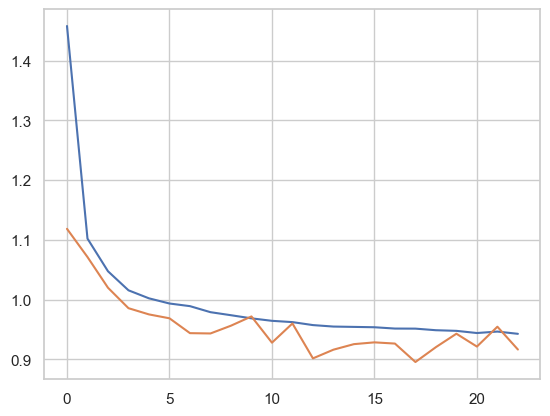

In [32]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

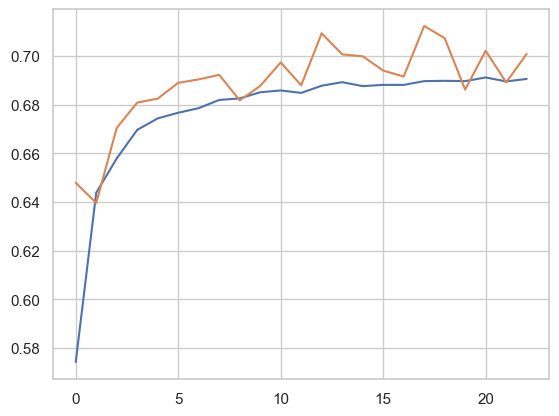

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

<Axes: >

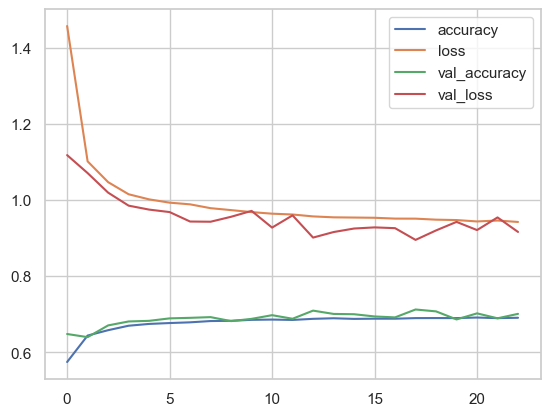

In [34]:
pd.DataFrame(history.history).plot()

In [35]:
def build_model(hp):
    model = keras.Sequential()
    num_of_layer = hp.Int('num_of_layer', min_value=1, max_value=5, step=1)
    model.add(keras.layers.InputLayer(input_shape=(20,)))
    for i in range(num_of_layer):
        model.add(keras.layers.Dense(
            units=hp.Int(f'unit_{i}_layer', min_value=20, max_value=40, step=2),
            activation='relu'
        ))
        model.add(BatchNormalization())
        model.add(keras.layers.Dropout(
            rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
        ))
    model.add(keras.layers.Dense(11, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [36]:
tuner1 = keras_tuner.RandomSearch(hypermodel=build_model, objective='val_accuracy', max_trials=10, max_retries_per_trial=3,
                                directory = '/Modeli/',
                                 project_name='Diplomski')

Reloading Tuner from /Modeli/Diplomski\tuner0.json


In [37]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]

In [38]:
tuner1.search(x_train_scaled, y_train_one_hot , epochs = 150, validation_data = (x_test_scaled, y_test_one_hot), callbacks = callbacks)

In [39]:
best_param = tuner1.get_best_hyperparameters(num_trials=1)[0]

In [40]:
model1 = tuner1.hypermodel.build(best_param)

In [41]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 22)                  │             462 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 22)                  │              88 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 38)                  │             874 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 38)                  │             152 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 38)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 24)                  │             936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 36)                  │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 36)                  │             144 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 11)                  │             407 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,755 (18.57 KB)

 Trainable params: 4,467 (17.45 KB)

 Non-trainable params: 288 (1.12 KB)

In [42]:
history = model1.fit(x_train_scaled, y_train_one_hot ,epochs=100, validation_data=(x_test_scaled, y_test_one_hot))

Epoch 1/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5052 - loss: 1.4263 - val_accuracy: 0.6344 - val_loss: 1.0239
Epoch 2/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5978 - loss: 1.1531 - val_accuracy: 0.6373 - val_loss: 1.0221
Epoch 3/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6092 - loss: 1.1238 - val_accuracy: 0.6615 - val_loss: 0.9635
Epoch 4/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6215 - loss: 1.0928 - val_accuracy: 0.6620 - val_loss: 0.9388
Epoch 5/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6274 - loss: 1.0774 - val_accuracy: 0.6642 - val_loss: 0.9247
Epoch 6/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6328 - loss: 1.0628 - val_accuracy: 0.6734 - val_loss: 0.9345
Epoch 7/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6364 - loss: 1.0488 - val_accuracy: 0.6662 - val_loss: 0.9195
Epoch 8/100
4125/4125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6399 - loss: 1

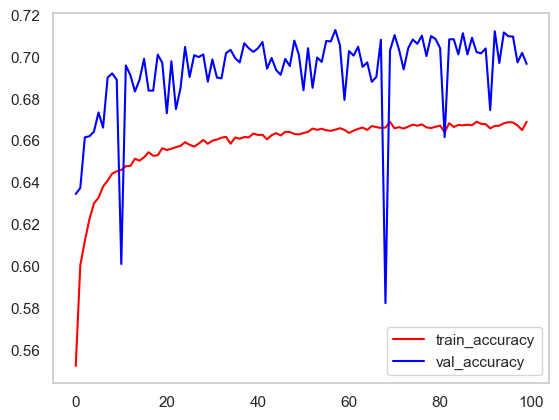

In [43]:
plt.plot(history.history['accuracy'], color = 'red',label = 'train_accuracy' )
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'val_accuracy')
plt.legend()
plt.grid()
plt.plot()
plt.show()

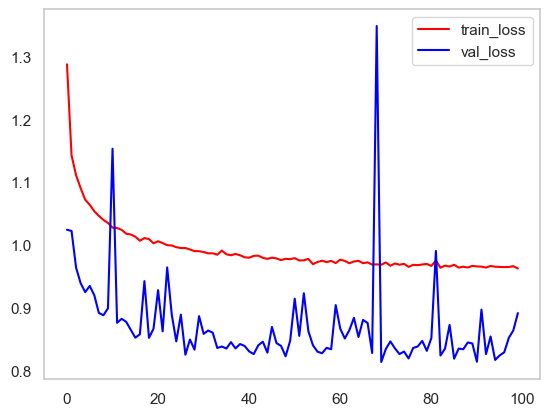

In [44]:
plt.plot(history.history['loss'], color = 'red', label = 'train_loss')
plt.plot(history.history['val_loss'], color = 'blue', label = 'val_loss')
plt.legend()
plt.grid()
plt.plot()
plt.show()